<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/%5Bpraktikum1%5D_data_mining_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#latihan 

In [ ]:
import numpy as np


In [ ]:
x1 = -1
x2 = 1

In [ ]:
winput = [0.8, -0.4, -0.2, 0.2, 0.5]
whidden = [0.5, 0.1]
bias_input = [0.4, 0.6]
bias_output = -0.3

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculate the output of the hidden layer
hidden_layer_input = x1 * winput[0] + x2 * winput[1] + bias_input[0]
hidden_layer_output = sigmoid(hidden_layer_input)

In [ ]:
# Calculate the final weight
output_layer_input = hidden_layer_output * whidden[0] + bias_output
output = sigmoid(output_layer_input)

In [ ]:
output

0.4638165529206009

##1
apa itu data mining

Data mining adalah proses pengumpulan dan pengolahan data yang bertujuan untuk mengekstrak informasi penting pada data, secara
 sederhana, memiliki istilah yang digunakan untuk menjelaskan proses pencarian atau penambangan knowledge dari data yang sangat besar

##2

kelebihan : Implementasinya tidak terlalu rumit, cocok untuk mengevaluasi probabilitas bersyarat. Selain itu, penerapannya pun sangat cepat dan ada iterasi.

kekurangan :

tidak berlaku jika probabiitasnya nol. independence antar atribut membuat akurasinya berkurang 


##3.


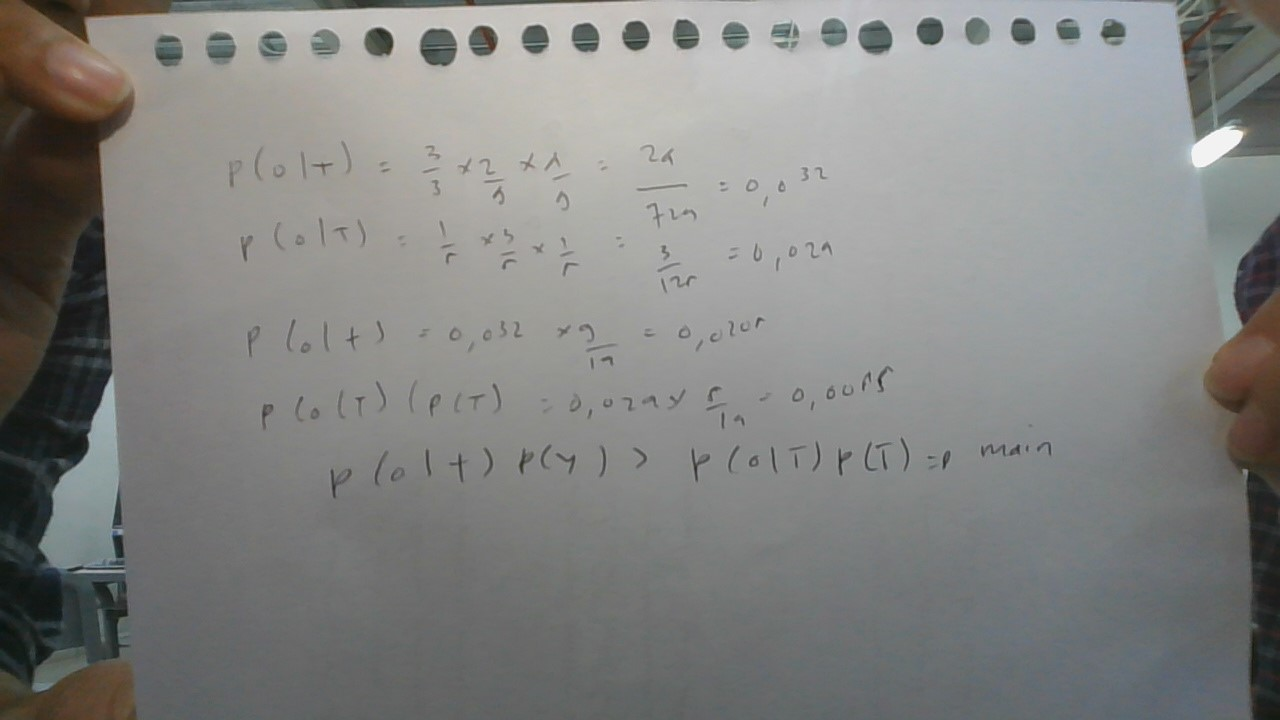

In [ ]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 95.0


#modul ke 2


In [ ]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load the iris dataset
df_iris = pd.read_csv('/content/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_iris.info()
df_iris.drop("Id", axis=1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


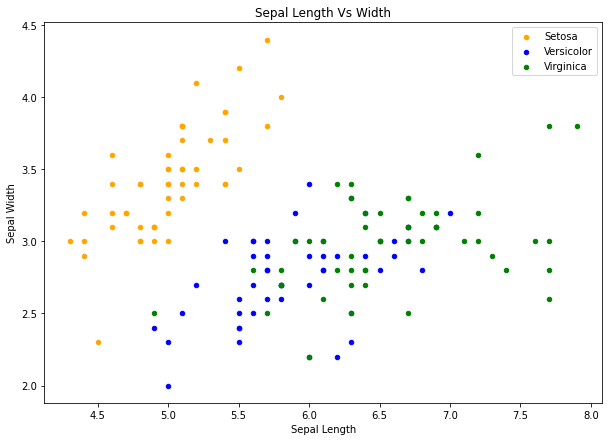

In [ ]:
fig = df_iris[df_iris.Species == 'Iris-setosa'].plot(kind='scatter',
x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
df_iris[df_iris.Species == 'Iris-versicolor'].plot(kind='scatter',
x='SepalLengthCm', y='SepalWidthCm', color='blue',
label='Versicolor', ax=fig)
df_iris[df_iris.Species == 'Iris-virginica'].plot(kind='scatter',
x='SepalLengthCm', y='SepalWidthCm', color='green',
label='Virginica', ax=fig)
 
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')
 
fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

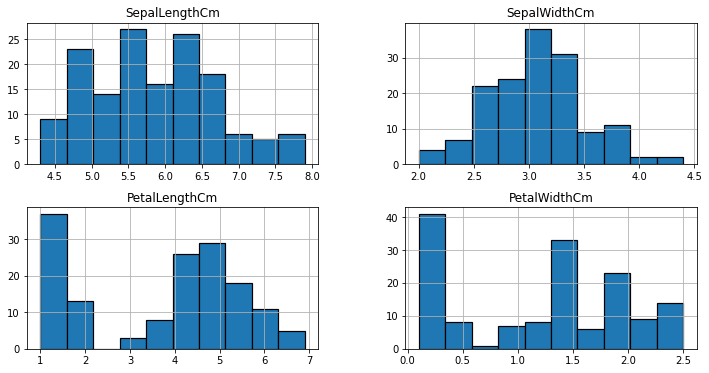

In [ ]:
df_iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

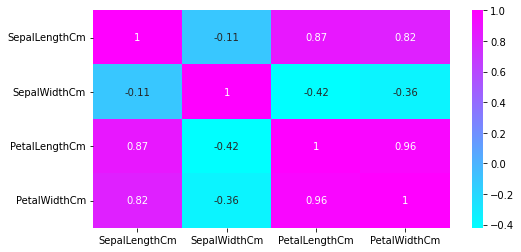

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df_iris.corr(), annot=True, cmap='cool') 
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_iris, test_size=0.25) # our main 
#data split into train and test
#splits the data into 75% and 25% ratio
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [ ]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
# taking the training data features
train_y = train.Species # output of the training data
 
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
# taking test data feature
test_y = test.Species # output value of the test data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [ ]:
# Melakukan Fitting Naive Bayes Classification untuk Training set dengan linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_X, train_y)

GaussianNB()

In [ ]:
# Memeriksa Hasil Klasifikasi
y_pred = nvclassifier.predict(test_X)
print(y_pred)
 
# Periksa actual dan predicted
y_compare = np.vstack((test_y,y_pred)).T
# Hasil actual berada di kiri dan predicted di sebelah kanan
# Menunjukkan 5 baris pertama
y_compare[:5,:]

['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa']


array([['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
print(cm)
 
# Classification report and accuracy
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_y, y_pred))
print("Accuracy :",accuracy_score(test_y, y_pred))

[[14  0  0]
 [ 0  9  0]
 [ 0  0 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

Accuracy : 1.0


## multinomial

In [ ]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# loading data
df = pd.read_csv('/content/Spam SMS Collection', sep='\t', header=0)
df

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


### Explorasi 



In [ ]:
df.shape

(5571, 2)

In [ ]:
# Definisikan Kolom
df.columns =['label', 'text']
df

,label,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Definisikan tipe data

# changing the dataframe 
# data types to string
df = df.astype(str)

# show the data types 
# of dataframe



In [ ]:
df.dtypes

label    object
text     object
dtype: object

In [ ]:
df.head()

,label,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df.tail()

,label,text
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...
5570,ham,Rofl. Its true to its name


In [ ]:
# Definisikan Informasi data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5571 non-null   object
 1   text    5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe(include='object') #Apakah terdapat nilai NaN dalam data set?

,label,text
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [ ]:
# Mapping values for label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df

,label,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,1,This is the 2nd time we have tried 2 contact u...
5567,0,Will ü b going to esplanade fr home?
5568,0,"Pity, * was in mood for that. So...any other s..."
5569,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5571 non-null   int64 
 1   text    5571 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
# Definisikan 5 baris awal tabel untuk mengecek label
df.head(5)

,label,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
# Definisikan 5 baris akhir tabel
df.tail(5)

,label,text
5566,1,This is the 2nd time we have tried 2 contact u...
5567,0,Will ü b going to esplanade fr home?
5568,0,"Pity, * was in mood for that. So...any other s..."
5569,0,The guy did some bitching but I acted like i'd...
5570,0,Rofl. Its true to its name


In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

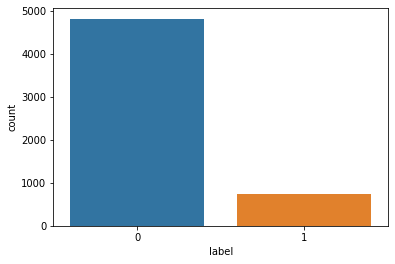

In [ ]:
# Buat visualisasi Countplot for Spam vs. Ham sebagai imbalanced dataset

# count plot on single categorical variable
sns.countplot(x ='label', data = df)
 
# Show the plot
plt.show()

###featuring enginering

In [ ]:
# Handling imbalanced dataset using Oversampling
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4824


In [ ]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape

(9306, 2)

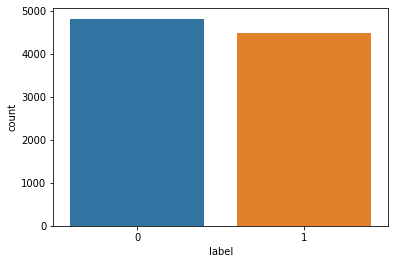

In [ ]:
# Buat Visualisasi Countplot for Spam vs. Ham as balanced dataset

# count plot on single categorical variable
sns.countplot(x ='label', data = df)
 
# Show the plot
plt.show()

In [ ]:
# Creating new feature word_count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [ ]:
df.head()

,label,text,word_count
0,0,Ok lar... Joking wif u oni...,6
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
2,0,U dun say so early hor... U c already then say...,11
3,0,"Nah I don't think he goes to usf, he lives aro...",13
4,1,FreeMsg Hey there darling it's been 3 week's n...,32


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


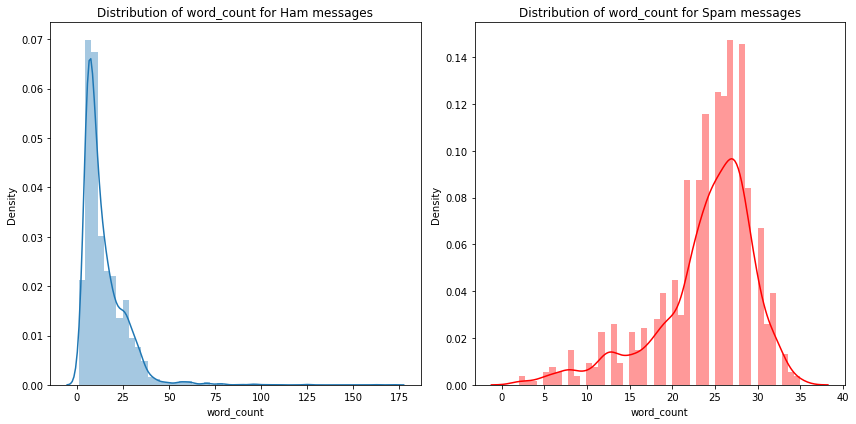

In [ ]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

In [ ]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['text'].apply(currency)

In [ ]:
df.tail()

,label,text,word_count,contains_currency_symbol
5536,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5539,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5546,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5565,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5566,1,This is the 2nd time we have tried 2 contact u...,30,1


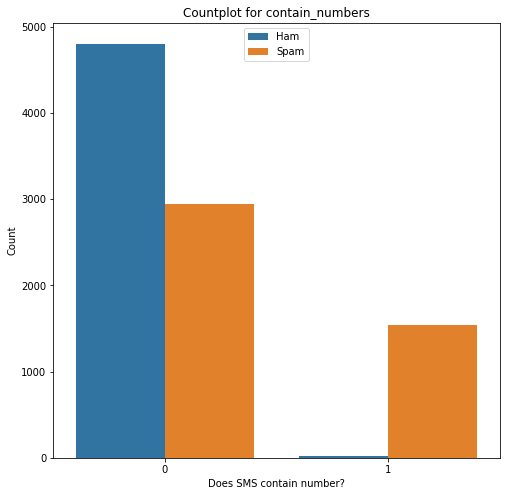

In [ ]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

###data cleaning

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.text):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [ ]:
# Definisikan Data dari Corpus sampai 5 baris
top_5_baris_dari_corpus = corpus[:5]
top_5_baris_dari_corpus

['ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv']

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Model Building & Evaluation**
_**Metric: F1-Score**_

* Multinomial Naive Bayes: 0.943

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Definisikan split data test dan train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6979, 500), (2327, 500), (6979,), (2327,))

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB

# Definisikan Multinomial Navie Bayes
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.943 ---
Standard Deviation: 0.004


In [ ]:
# Classification report for MNB model
# Definisikan Multinomial Navie Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Definisikan Predict dari Multinomial Navie Bayes
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
# print classification report #Definsikan!
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print("Accuracy :",accuracy_score(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1215
           1       0.95      0.94      0.95      1112

    accuracy                           0.95      2327
   macro avg       0.95      0.95      0.95      2327
weighted avg       0.95      0.95      0.95      2327

Accuracy : 0.949290932531156


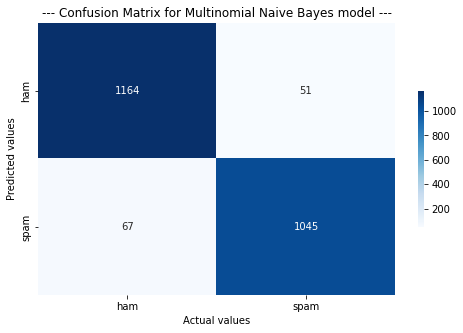

In [ ]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

# Membuat Prediksi

In [ ]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return mnb.predict(temp)

In [ ]:
# Prediction 1 - Lottery text message (SMS SPAM DAPAT HADIAH JUTAAN RUPIAH ALIAS PENIPUAN)
# Definisikan!
sample_message = "CONGRATULATIONS YOU GET 500 MILLION MONEY FROM BANK BCA REWARDS CAN BE PICKED UP BY CALLING THE FOLLOWING NO: 08515183814"
if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Prediction 2 - Casual text chat (Bukan SMS SPAM)
# Definisikan!
sample_message = "Want to hear a funny story?"

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"
